In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


insurance_df = pd.read_csv("insurance.csv")

In [2]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Feature Engineering

In [4]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
features_df= insurance_df.drop('charges', axis=1)
features_df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [6]:
features_df= insurance_df.drop('charges', axis=1)
features_df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [7]:
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex','smoker', 'region']

numeric_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

full_processor_insurance = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

full_processor_insurance.fit(features_df)
full_processor_insurance.transform(features_df)
insurance_set_mod = pd.DataFrame(full_processor_insurance.transform(features_df), columns=full_processor_insurance.get_feature_names_out())
insurance_set_mod

,number__age,number__bmi,number__children,category__sex_female,category__sex_male,category__smoker_no,category__smoker_yes,category__region_northeast,category__region_northwest,category__region_southeast,category__region_southwest
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Modelling

In [8]:
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(features_df, insurance_df['charges'], test_size=0.2, random_state=123)

### Multiple Linear Regression

In [9]:
mlr_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('model', linear_model.LinearRegression())
])


mlr_reg.fit(X_train, y_train)

y_pred_train = mlr_reg.predict(X_train)
y_pred_test = mlr_reg.predict(X_test)

accuracy_MLR_train = r2_score(y_train, y_pred_train)
accuracy_MLR_test = r2_score(y_test, y_pred_test)

RMSE_MLR_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_MLR_test = mean_squared_error(y_test, y_pred_test, squared=False)

y_pred_cv_MLR = cross_val_predict(mlr_reg, X=features_df, y=insurance_df['charges'], cv=5)
accuracy_cv_MLR = r2_score(insurance_df['charges'], y_pred_cv_MLR)

print("Coefficients: \n", mlr_reg[-1].coef_)
print('RMSE for Training Data: %.2f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Training Accuracy for Multiple Linear Regression Model: %.2f' % r2_score(y_train, y_pred_train))
print('RMSE for Testing Data: %.2f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Testing Accuracy for Multiple Linear Regression Model: %.2f' % r2_score(y_test, y_pred_test))
print('Accuracy for 5-Fold Cross Predicted Multiple Linaer Regression Model: %.2f' % r2_score(insurance_df['charges'], y_pred_cv_MLR))

Coefficients: 
 [ 1.17613663e+04  1.27194590e+04  2.24607186e+03 -4.33436370e+16
 -4.33436370e+16 -3.83638733e+15 -3.83638733e+15 -1.20510055e+15
 -1.20510055e+15 -1.20510055e+15 -1.20510055e+15]
RMSE for Training Data: 6166.35
Training Accuracy for Multiple Linear Regression Model: 0.74
RMSE for Testing Data: 5526.80
Testing Accuracy for Multiple Linear Regression Model: 0.80
Accuracy for 5-Fold Cross Predicted Multiple Linaer Regression Model: 0.75


In [10]:
y_pred_cv_MLR

array([25460.11208725,  3725.53746221,  7060.11553967, ...,
        4202.15481526,  1078.70907307, 37023.90505333])

### Polynomial Regression

In [11]:
lr2_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', linear_model.LinearRegression())
])

lr2_reg.fit(X_train, y_train)


y_pred_train = lr2_reg.predict(X_train)
y_pred_test = lr2_reg.predict(X_test)

accuracy_PR_train = r2_score(y_train, y_pred_train)
accuracy_PR_test = r2_score(y_test, y_pred_test)

RMSE_PR_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_PR_test = mean_squared_error(y_test, y_pred_test, squared=False)

y_pred_cv_PR = cross_val_predict(lr2_reg, X=features_df, y=insurance_df['charges'], cv=5)
accuracy_cv_PR = r2_score(insurance_df['charges'], y_pred_cv_PR)

print("Coefficients: \n",  lr2_reg[-1].coef_)
print('RMSE for Training Data: %.2f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Training Accuracy for Polynomial Regression Model: %.2f' % r2_score(y_train, y_pred_train))
print('RMSE for Testing Data: %.2f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Testing Accuracy for Polynomial Regression Model: %.2f' % r2_score(y_test, y_pred_test))
print('Accuracy for 5-Fold Cross Predicted Polynomial Regression Model: %.2f' % r2_score(insurance_df['charges'], y_pred_cv_PR))

Coefficients: 
 [-2.59106076e+16  2.44384133e+16 -5.21436553e+15 -1.72868657e+16
 -5.42647763e+15  1.36719216e+17  3.31202818e+16  6.50125815e+16
  6.25915148e+16  3.91438710e+16  7.34245553e+16  8.63600000e+03
 -8.20000000e+01 -1.23550000e+03  2.63243553e+16  2.63243553e+16
 -1.11115254e+16 -1.11115254e+16  1.06977778e+16  1.06977778e+16
  1.06977778e+16  1.06977778e+16 -7.03900000e+03  4.58000000e+02
 -1.46945711e+16 -1.46945711e+16 -9.51569796e+15 -9.51569796e+15
 -2.28144206e+14 -2.28144206e+14 -2.28144206e+14 -2.28144206e+14
 -2.61650000e+03 -2.17626763e+16 -2.17626763e+16  1.69378414e+16
  1.69378414e+16  1.00392004e+16  1.00392004e+16  1.00392004e+16
  1.00392004e+16  2.49839406e+16  0.00000000e+00 -1.92220954e+16
  1.49943889e+16 -1.01092111e+16  2.81698743e+15  1.54009946e+16
  3.46182106e+15  2.08452104e+15 -5.65076369e+15  2.85657206e+16
 -1.26415114e+16  2.84687123e+14  1.28686943e+16  9.29520753e+14
 -2.18522469e+16  0.00000000e+00 -1.27457616e+16 -8.35506382e+15
  1.26061

### Decision Tree Regression

In [12]:
dtr_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', DecisionTreeRegressor(max_depth=6, random_state=123))
])

dtr_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model',
                 DecisionTreeRegressor(max_depth=6, random_state=123))])

In [13]:
y_pred_train = dtr_reg.predict(X_train)
y_pred_test = dtr_reg.predict(X_test)

accuracy_DTR_train =  r2_score(y_train, y_pred_train)
accuracy_DTR_test = r2_score(y_test, y_pred_test)

RMSE_DTR_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_DTR_test = mean_squared_error(y_test, y_pred_test, squared=False)

y_pred_cv_DTR = cross_val_predict(dtr_reg, X=features_df, y=insurance_df['charges'], cv=5)
accuracy_cv_DTR = r2_score(insurance_df['charges'], y_pred_cv_DTR)

print('RMSE for Training Data: %.2f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Training Accuracy for Decision Tree Regression Model: %.2f' % r2_score(y_train, y_pred_train))
print('RMSE for Testing Data: %.2f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Testing Accuracy for Decision Tree Regression Model: %.2f' % r2_score(y_test, y_pred_test))
print('Accuracy for 5-Fold Cross Predicted Decision Tree Regression Model: %.2f' % r2_score(insurance_df['charges'], y_pred_cv_DTR))

RMSE for Training Data: 4049.97
Training Accuracy for Decision Tree Regression Model: 0.89
RMSE for Testing Data: 4568.50
Testing Accuracy for Decision Tree Regression Model: 0.86
Accuracy for 5-Fold Cross Predicted Decision Tree Regression Model: 0.82


### Radom Forest Regression

In [14]:
rf_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('model', RandomForestRegressor(max_depth=7, random_state=123))
])

rf_reg.fit(X_train, y_train)


y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)

accuracy_RFR_train = r2_score(y_train, y_pred_train)
accuracy_RFR_test = r2_score(y_test, y_pred_test)

RMSE_RFR_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_RFR_test = mean_squared_error(y_test, y_pred_test, squared=False)

y_pred_cv_RFR = cross_val_predict(rf_reg, X=features_df, y=insurance_df['charges'], cv=5)
accuracy_cv_RFR = r2_score(insurance_df['charges'], y_pred_cv_RFR)


print('RMSE for Training Data: %.2f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Training Accuracy for Radom Forest Regression Model: %.2f' % r2_score(y_train, y_pred_train))
print('RMSE for Testing Data: %.2f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Testing Accuracy for Radom Forest Regression Model: %.2f' % r2_score(y_test, y_pred_test))
print('Accuracy for 5-Fold Cross Predicted Random Forest Regression Model: %.2f' % r2_score(insurance_df['charges'], y_pred_cv_RFR))

RMSE for Training Data: 3293.09
Training Accuracy for Radom Forest Regression Model: 0.93
RMSE for Testing Data: 3961.50
Testing Accuracy for Radom Forest Regression Model: 0.90
Accuracy for 5-Fold Cross Predicted Random Forest Regression Model: 0.85


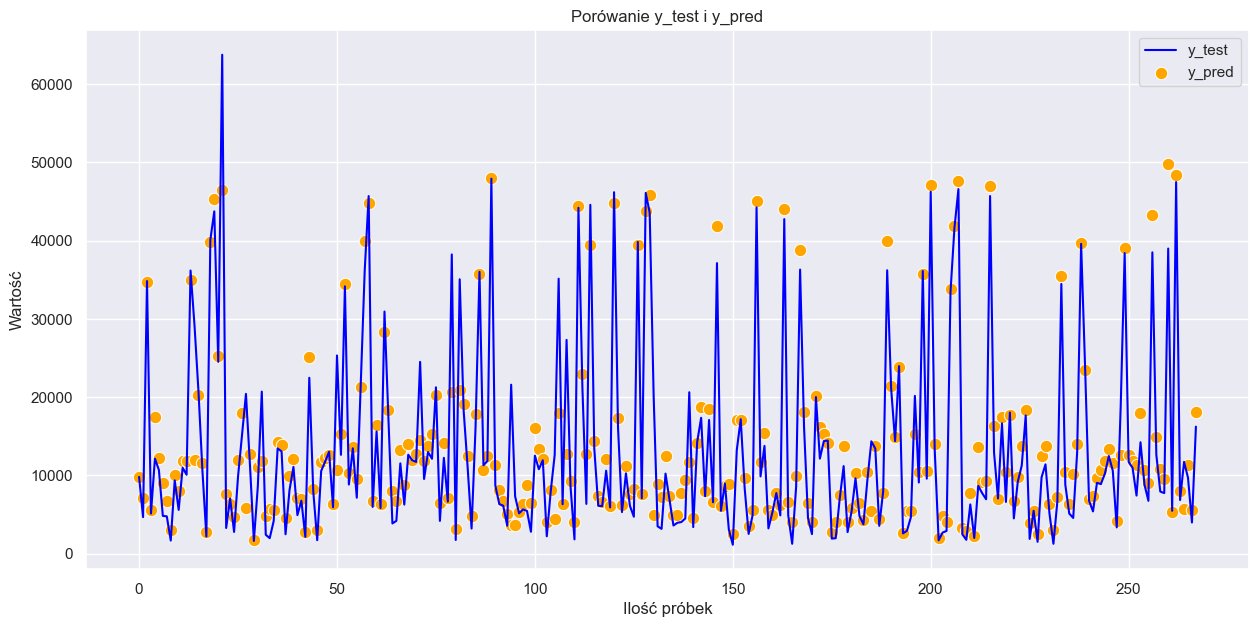

In [15]:
result_df = pd.DataFrame({'Ilość próbek': range(len(X_test)), 'y_test':y_test})
sns.set_theme(palette="pastel")
plt.figure(figsize=(15, 7))
sns.lineplot(data=result_df, x='Ilość próbek', y=y_test, label='y_test', color='blue',)
sns.scatterplot(data=result_df, x='Ilość próbek', y=y_pred_test, label='y_pred',color='orange', s=80)
plt.xlabel('Ilość próbek')
plt.ylabel('Wartość')
plt.title('Porówanie y_test i y_pred')
plt.legend()
plt.show()

### Xgboost Regression

In [16]:
xgb_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('model', xgb.XGBRegressor(learning_rate = 0.5, gamma = 0.1,
                       objective='reg:squarederror',
                       n_estimators=30, max_depth=10, max_leaves=15))
])

xgb_reg.fit(X_train, y_train)

y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)

accuracy_XGBR_train = r2_score(y_train, y_pred_train)
accuracy_XGBR_test = r2_score(y_test, y_pred_test)

RMSE_XGBR_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_XBGR_test = mean_squared_error(y_test, y_pred_test, squared=False)

y_pred_cv_XGBR = cross_val_predict(xgb_reg, X=features_df, y=insurance_df['charges'], cv=5)
accuracy_cv_XGBR = r2_score(insurance_df['charges'], y_pred_cv_XGBR)


print('RMSE for Training Data: %.2f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Training Accuracy for Xgboost Regression Model: %.2f' % r2_score(y_train, y_pred_train))
print('RMSE for Testing Data: %.2f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Testing Accuracy for Xgboost Regression Model: %.2f' % r2_score(y_test, y_pred_test))
print('Accuracy for 5-Fold Cross Predicted Xgboost Regression Model: %.2f' % r2_score(insurance_df['charges'], y_pred_cv_XGBR))

RMSE for Training Data: 3141.06
Training Accuracy for Xgboost Regression Model: 0.93
RMSE for Testing Data: 4125.32
Testing Accuracy for Xgboost Regression Model: 0.89
Accuracy for 5-Fold Cross Predicted Xgboost Regression Model: 0.84


In [17]:

reg_pipeline = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('model', xgb.XGBRegressor())
])

params = {
    'model__learning_rate': [0.1, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [5, 10, 15, 20, 30],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_child_weight': [1, 2, 3]
}


reg= GridSearchCV(estimator=reg_pipeline,
                   param_grid=params,
                   scoring='r2',
                   verbose=1)

reg.fit(X_train, y_train)

print("Best parameters:", reg.best_params_)
print("Highest r2 score: ", reg.best_score_)
print("Best model: ", reg.best_estimator_)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters: {'model__learning_rate': 0.25, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 15}
Highest r2 score:  0.8455413203685179
Best model:  Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
              

### Exploartion of results

In [18]:
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_XGBR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_XGBR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_XGBR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_XBGR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR,accuracy_cv_XGBR]
parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=7", "n_estimators=100, max_depth=7",'learning_rate = 0.5, gamma = 0.1, n_estimators=30, max_depth=10, max_leaves=15' ]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "5-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Xgboost Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,5-Fold Score
Multiple Linear Regression,fit_intercept=False,0.737619,0.800220,6166.349720,5526.796960,0.748121
Polynomial Regression,fit_intercept=False,0.833300,0.897071,4915.073349,3967.038454,0.835608
Decision Tree Regression,max_depth=7,0.886818,0.863494,4049.967653,4568.495428,0.822452
Random Forest Regression,"n_estimators=100, max_depth=7",0.925169,0.897358,3293.088839,3961.498767,0.852046
Xgboost Regression,"learning_rate = 0.5, gamma = 0.1, n_estimators...",0.931919,0.888693,3141.055278,4125.321653,0.838260


<Axes: >

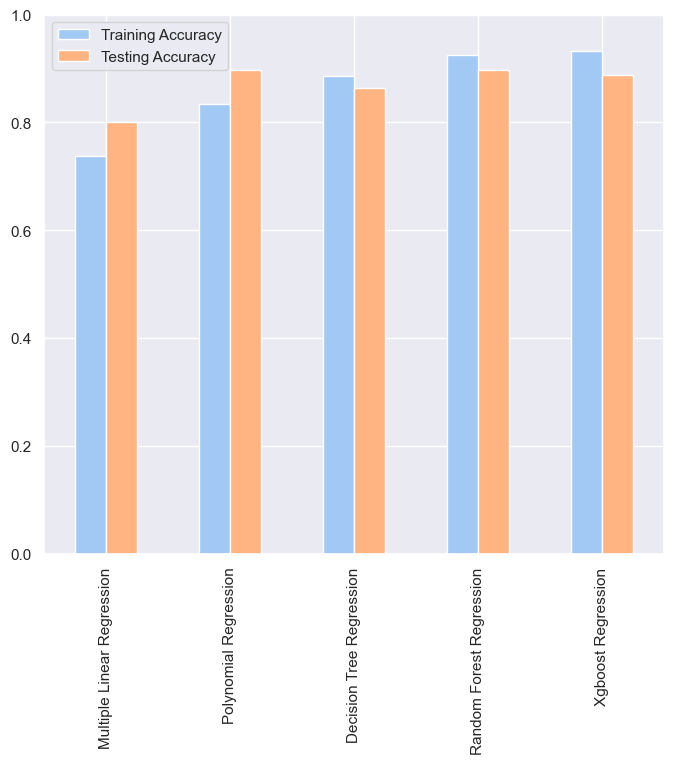

In [19]:
table_dataframe.iloc[:, 1:3].plot(kind="bar", ylim=[0.0, 1.0], figsize=(8,7))

<Axes: >

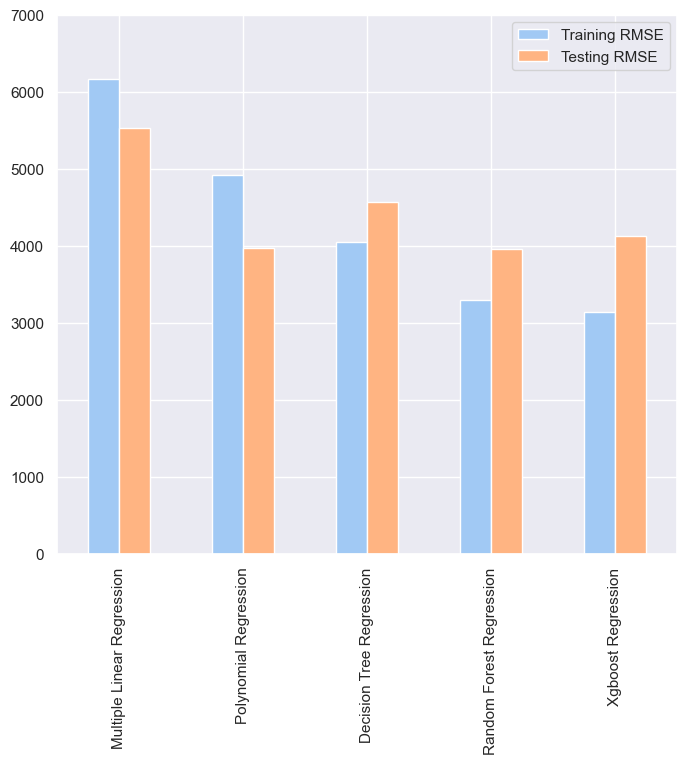

In [20]:
table_dataframe.iloc[:, 3:5].plot(kind="bar", ylim=[0, 7000], figsize=(8,7))

<Axes: >

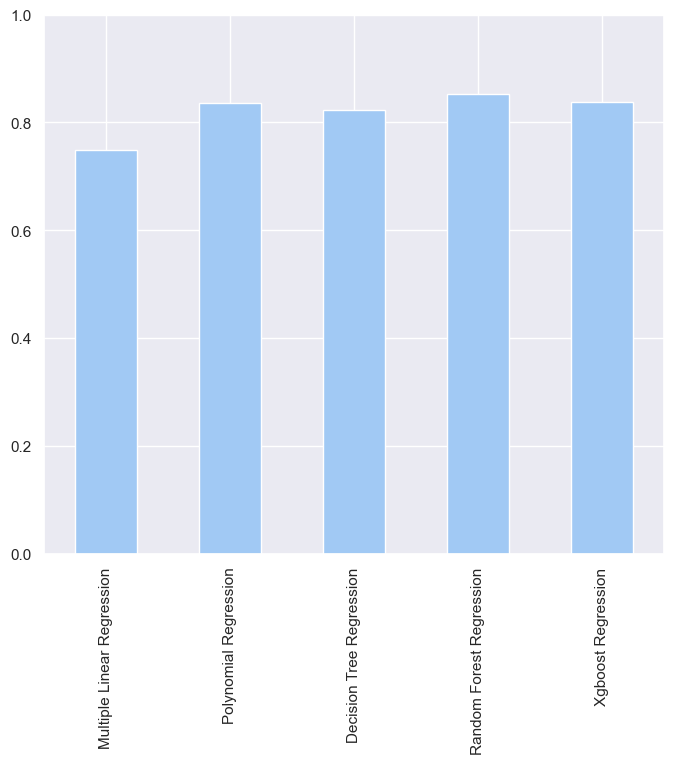

In [21]:
table_dataframe.iloc[:, 5].plot(kind="bar", ylim=[0.0, 1.0], figsize=(8,7))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features_df, insurance_df['charges'], test_size=0.3, random_state=1)

lr3_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', linear_model.Lasso(alpha=0.1))
])

lr3_reg.fit(X_train, y_train)


y_pred_train = lr3_reg.predict(X_train)
y_pred_test = lr3_reg.predict(X_test)

accuracy_R_train = r2_score(y_train, y_pred_train)
accuracy_R_test = r2_score(y_test, y_pred_test)

RMSE_R_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_R_test = mean_squared_error(y_test, y_pred_test, squared=False)

y_pred_cv_R = cross_val_predict(lr2_reg, X=features_df, y=insurance_df['charges'], cv=5)
accuracy_cv_R = r2_score(insurance_df['charges'], y_pred_cv_R)

print("Coefficients: \n",  lr3_reg[-1].coef_)
print('RMSE for Training Data: %.2f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Training Accuracy for Polynomial Regression Model: %.2f' % r2_score(y_train, y_pred_train))
print('RMSE for Testing Data: %.2f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Testing Accuracy for Polynomial Regression Model: %.2f' % r2_score(y_test, y_pred_test))
print('Accuracy for 5-Fold Cross Predicted Polynomial Regression Model: %.2f' % r2_score(insurance_df['charges'], y_pred_cv_R))

Coefficients: 
 [ 1.06283717e+04  2.96913899e+04  8.49180202e+01  9.48301124e+01
 -0.00000000e+00 -2.35917070e+04  3.22889519e-13  7.78733293e+02
  6.51920540e+02 -8.76534217e+02 -0.00000000e+00  7.92400987e+03
  1.92612002e+03  1.22904177e+03 -5.19243498e+03 -4.09528180e+03
 -1.54419011e+03 -1.85254914e+03 -2.33384328e+03 -2.45163096e+03
  5.36856903e+02 -0.00000000e+00 -6.95491342e+03 -2.76299771e+03
  1.21194703e+02  4.83269487e+02 -2.83840028e+04  2.52896569e+04
  7.14863606e+03  6.37591362e+03  9.34518590e+02  4.05971539e+03
 -1.96412519e+03  1.11231916e+03  5.73840144e+02  3.66963657e+03
  0.00000000e+00  3.75956045e+02  2.68801158e+03  0.00000000e+00
 -2.22981576e+02  2.95063398e+03  0.00000000e+00  5.76271709e+03
 -1.35330679e+04 -6.54931709e+02 -1.23051094e+03  0.00000000e+00
 -8.38565230e+02  8.24339444e+02  7.37626045e+03 -1.25896847e+04
 -1.27477504e+03 -2.00749709e+03  2.85755751e+01 -1.46774371e+03
  2.52041461e+02  0.00000000e+00 -1.73207203e+02  0.00000000e+00
  6.53238

c:\Users\sieli\anaconda3\envs\test_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.474e+09, tolerance: 1.391e+07
  model = cd_fast.enet_coordinate_descent(
